Ipython3 Notebook for experiment nr. 234
================

it is assumend, that this notebook is in the same directory as the module for this experiment.

change the filenames and paths according to your set up

In [1]:
## using inline plots
%matplotlib inline

## importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
#import pylab as py
import ap21_module as main
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
#from scipy.stats import chi2

1.1) Himmelslicht Fenster offen/zu
===

-c:20: RuntimeWarning: divide by zero encountered in true_divide


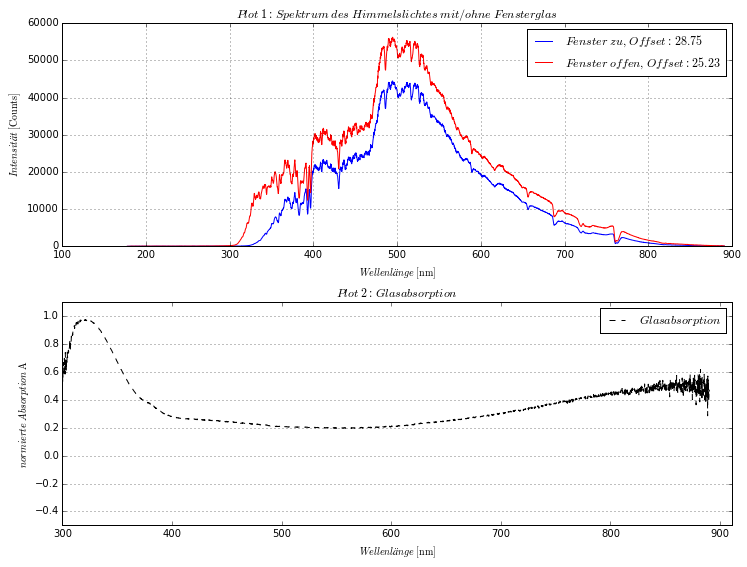

In [2]:
## loading data
# fenster zu
fz_lamb, fz_int = np.genfromtxt('.data/fensterzu.txt', skiprows=17, unpack=True, dtype='str') ## comma decimal points instead of dots
fz_lamb = [float(i.replace(',','.')) for i in fz_lamb]
fz_int = [float(i.replace(',','.')) for i in fz_int]
#fenster offen
fo_lamb, fo_int = np.genfromtxt('.data/fensteroffen.txt', skiprows=17, unpack=True, dtype='str') ## comma decimal points instead of dots
fo_lamb = [float(i.replace(',','.')) for i in fo_lamb]
fo_int = [float(i.replace(',','.')) for i in fo_int]

## offset; adding an offset, so that no value is <0
#fenster zu
offsetz = np.abs(np.min(fz_int))
fz_int = fz_int + offsetz
#fenster offen
offseto = np.abs(np.min(fo_int))
fo_int = fo_int + offseto

## Glasabsorption
A = 1. - np.array(fz_int)/np.array(fo_int)

##plotting
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(211)
ax.plot(fz_lamb, fz_int, 'b-', label='$Fenster\ zu,\ Offset:\ ' + str(offsetz) + '$')
ax.plot(fo_lamb, fo_int, 'r-', label='$Fenster\ offen,\ Offset:\ ' + str(offseto) + '$')
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 1:\ Spektrum\ des\ Himmelslichtes\ mit/ohne\ Fensterglas$')
ax.grid(axis='both')
ax.legend(loc=0)

ax = fig.add_subplot(212)
ax.plot(fo_lamb, A/np.max(A), 'k--', label='$Glasabsorption$')
ax.set_xlim(300, max(fo_lamb)+20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$normierte\ Absorption\ \mathrm{A}$')
ax.set_title('$Plot\ 2:\ Glasabsorption$')
ax.grid(axis='y')
ax.legend(loc=0)
#plt.savefig('.data/Plot1.pdf', dpi=200, format='pdf')

1.2) Fraunhoferlinien
===

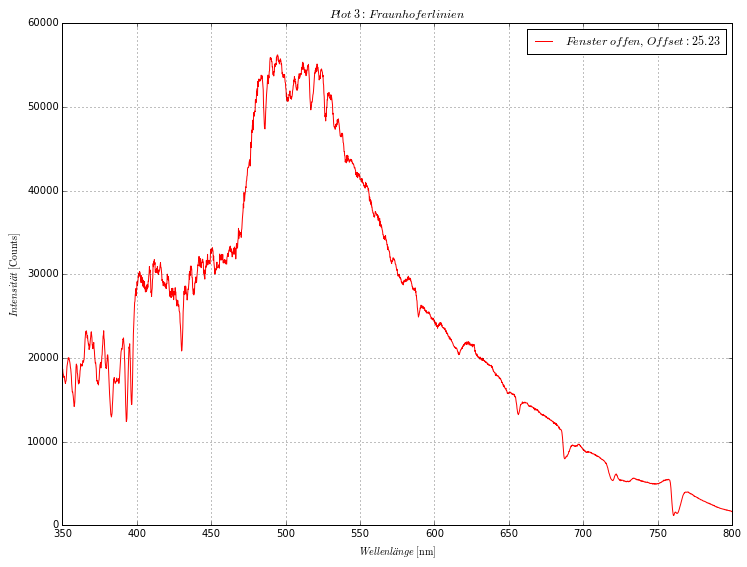

In [3]:
## plotting the spectrum measured without glass in a range from 350 to 800 nm

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot(fo_lamb, fo_int, 'r-', label='$Fenster\ offen,\ Offset:\ ' + str(offseto) + '$')
ax.set_xlim(350, 800)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 3:\ Fraunhoferlinien$')
ax.grid()
#ax.annotate('$A$', (759.4, 1000), xytext=(759.4, 8000),
#            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
#            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
ax.legend()
#plt.savefig('.data/Plot3.pdf', dpi=200, format='pdf')

1.3) Direktes Licht und Streulicht
===

In [4]:
## can't do nothin' 'cause we don't have the data for direct sunlight

2) Auswertung unterschiedl. Lichtquellen 
===

In [5]:
## already done during the experiment with spectraSuite *shudder*

3) Auswertung des Natriumspektrums
===

- Starke Linien:

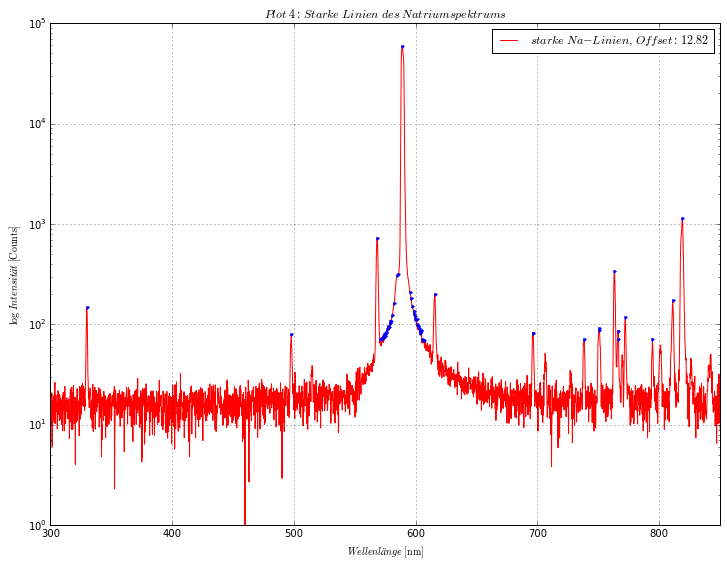

In [6]:
## loading data
# natrium stark nicht gesättigt
na_stark_lamb, na_stark_int = np.genfromtxt('.data/natrium_stark_nicht_gesaettigt.txt', 
                                            skiprows=17, unpack=True, dtype='str') ## comma decimal points instead of dots
na_stark_lamb = [float(i.replace(',','.')) for i in na_stark_lamb]
na_stark_int = [float(i.replace(',','.')) for i in na_stark_int]

## offset
offset_na_stark = np.abs(np.min(na_stark_int))
na_stark_int = na_stark_int + offset_na_stark

## find the wavelengths:
## find maxes
def find_max(data, threshold, upper_lim):
    maxes = []
    for i,j in enumerate(data):
        if( data[i-1] < j and j > data[i+1] and j > threshold and j < upper_lim):
            maxes.append((i,j))
    return maxes

maxima = find_max(na_stark_int, 70, np.infty)
#print(len(maxima))
maxima = np.array(maxima).transpose()
index = list(np.array(maxima[0], dtype='int'))

## plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot(na_stark_lamb, na_stark_int, 'r-', label='$starke\ Na-Linien,\ Offset:\ ' + str(offset_na_stark) + '$')
ax.plot(np.array(na_stark_lamb)[index], np.array(na_stark_int)[index], 'b.')
ax.set_yscale('log')
ax.set_xlim(300, 850)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$\mathrm{log}\ Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 4:\ Starke\ Linien\ des\ Natriumspektrums$')
ax.grid()
ax.legend(loc=0)
#plt.savefig('.data/Plot4.pdf', dpi=200, format='pdf')

In [7]:
print('wellenlänge\tintensität')
for i in np.array(maxima).T:
    index, intensity = i
    print(na_stark_lamb[int(index)], '\t\t', intensity)
    

wellenlänge	intensität
329.79 		 147.92
497.93 		 79.49
568.38 		 730.9
571.13 		 72.43
572.12 		 73.42
572.51 		 74.07
572.9 		 76.02
573.49 		 72.75
574.28 		 80.56
574.67 		 76.35
575.26 		 82.26
575.65 		 83.96
576.04 		 82.66
576.63 		 90.83
577.41 		 95.89
578.2 		 95.35
578.59 		 104.54
579.37 		 108.96
579.76 		 108.93
580.55 		 123.47
582.11 		 163.2
585.04 		 312.56
585.82 		 318.55
588.95 		 59577.27
595.38 		 211.66
596.35 		 182.99
597.32 		 153.88
598.49 		 136.42
598.88 		 126.72
599.46 		 120.24
599.85 		 113.91
600.82 		 112.49
601.21 		 101.92
601.79 		 96.46
602.18 		 96.22
602.96 		 91.57
603.34 		 85.96
603.73 		 82.15
604.31 		 87.62
604.7 		 85.55
605.28 		 71.69
606.06 		 70.73
606.64 		 70.54
615.73 		 200.08
696.02 		 81.76
696.39 		 81.33
738.47 		 71.52
750.66 		 87.79
751.03 		 91.89
763.32 		 338.53
765.84 		 71.66
766.2 		 86.88
772.31 		 118.21
794.42 		 72.16
811.17 		 173.92
819.04 		 1146.54


- Schwache Linien:

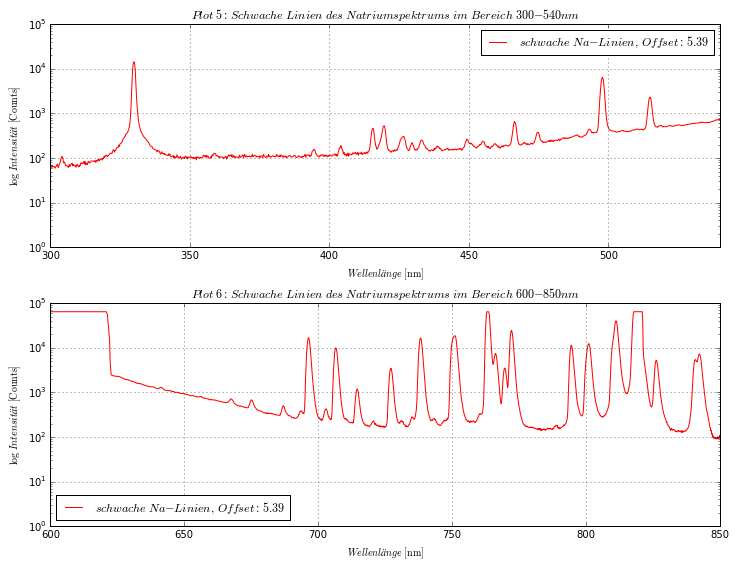

In [8]:
## loading data
# natrium stark gesättigt
na_schwach_lamb, na_schwach_int = np.genfromtxt('.data/natrium_schwach.txt', 
                                            skiprows=17, unpack=True, dtype='str') ## comma decimal points instead of dots
na_schwach_lamb = [float(i.replace(',','.')) for i in na_schwach_lamb]
na_schwach_int = [float(i.replace(',','.')) for i in na_schwach_int]

## offset
offset_na_schwach = np.abs(np.min(na_schwach_int))
na_schwach_int = na_schwach_int + offset_na_schwach

## find the wavelengths:
# for plot 5:
maxima5 = find_max(na_schwach_int, 120, 60000)
#print(len(maxima))
maxima5 = np.array(maxima5).transpose()
index5 = list(np.array(maxima5[0], dtype='int'))

# for plot 6:
maxima6 = find_max(na_schwach_int, 1000, np.infty)
#print(len(maxima))
maxima6 = np.array(maxima6).transpose()
index6 = list(np.array(maxima6[0], dtype='int'))

## plotting
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=.25)

ax = fig.add_subplot(211)
ax.plot(na_schwach_lamb, na_schwach_int, 'r-', label='$schwache\ Na-Linien,\ Offset:\ ' + str(offset_na_schwach) + '$')
#ax.plot(np.array(na_schwach_lamb)[index5], np.array(na_schwach_int)[index5], 'b.')
ax.set_yscale('log')
ax.set_xlim(300, 540)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$\mathrm{log}\ Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 5:\ Schwache\ Linien\ des\ Natriumspektrums\ im\ Bereich\ 300-540nm$')
ax.grid()
ax.legend(loc=0)

ax = fig.add_subplot(212)
ax.plot(na_schwach_lamb, na_schwach_int, 'r-', label='$schwache\ Na-Linien,\ Offset:\ ' + str(offset_na_schwach) + '$')
#ax.plot(np.array(na_schwach_lamb)[index6], np.array(na_schwach_int)[index6], 'b.')
ax.set_yscale('log')
ax.set_xlim(600, 850)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$\mathrm{log}\ Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 6:\ Schwache\ Linien\ des\ Natriumspektrums\ im\ Bereich\ 600-850nm$')
ax.grid()
ax.legend(loc=0)
#plt.savefig('.data/Plot5_6.pdf', dpi=200, format='pdf')

In [9]:
print('plot 5')
print('wellenlänge\tintensität')
for i in np.array(maxima5).T:
    index, intensity = i
    print(na_stark_lamb[int(index)], '\t\t', intensity)
    
print('\n')
print('plot 6')
print('wellenlänge\tintensität')
for i in np.array(maxima6).T:
    index, intensity = i
    print(na_stark_lamb[int(index)], '\t\t', intensity)
    

plot 5
wellenlänge	intensität
240.57 		 120.72
241.64 		 121.64
243.79 		 120.44
244.22 		 125.29
244.87 		 126.11
245.94 		 131.48
246.58 		 132.16
247.01 		 135.07
248.09 		 137.7
248.51 		 133.39
249.37 		 137.99
249.8 		 137.47
250.23 		 133.84
250.66 		 142.89
251.09 		 142.65
251.73 		 137.04
252.16 		 138.71
252.59 		 131.31
253.02 		 131.45
253.45 		 136.26
253.88 		 136.71
254.73 		 136.84
255.38 		 131.28
255.8 		 137.63
256.23 		 142.46
256.88 		 133.4
257.73 		 134.6
258.38 		 132.65
258.8 		 129.43
259.45 		 129.78
259.87 		 131.72
260.94 		 125.12
261.8 		 126.03
262.44 		 136.46
263.08 		 132.32
263.73 		 136.78
265.01 		 133.62
265.86 		 137.15
266.29 		 134.33
266.93 		 132.55
267.36 		 139.85
267.79 		 129.67
268.43 		 139.04
269.07 		 132.24
269.5 		 128.55
270.14 		 131.92
270.57 		 129.17
270.99 		 129.95
321.56 		 128.43
322.61 		 154.7
324.09 		 173.73
324.52 		 197.08
330.0 		 14401.37
337.8 		 153.27
338.43 		 148.18
338.85 		 146.16
339.9 		 139.41
340.32 		 1

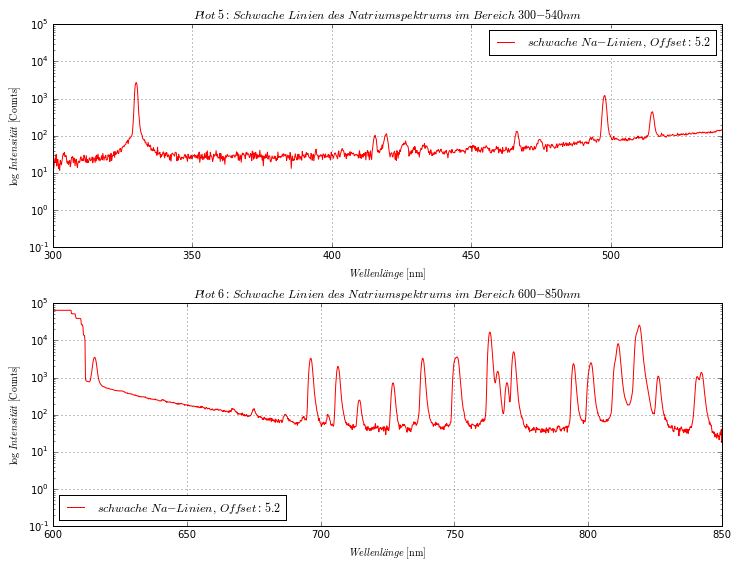

In [10]:
########################################################################
# PLOTTING AGAIN WITH OTHER DATA TO MAKE THE LINE AROUND 620nm VISIBLE #
########################################################################

## loading data
# natrium stark gesättigt
na_schwach_lamb, na_schwach_int = np.genfromtxt('.data/natrium_stark_gesaettigt.txt', 
                                            skiprows=17, unpack=True, dtype='str') ## comma decimal points instead of dots
na_schwach_lamb = [float(i.replace(',','.')) for i in na_schwach_lamb]
na_schwach_int = [float(i.replace(',','.')) for i in na_schwach_int]

## offset
offset_na_schwach = np.abs(np.min(na_schwach_int))
na_schwach_int = na_schwach_int + offset_na_schwach

## find the wavelengths:
# for plot 5:
maxima5 = find_max(na_schwach_int, 70, 60000)
#print(len(maxima))
maxima5 = np.array(maxima5).transpose()
index5 = list(np.array(maxima5[0], dtype='int'))

# for plot 6:
maxima6 = find_max(na_schwach_int, 1000, 60000)
#print(len(maxima))
maxima6 = np.array(maxima6).transpose()
index6 = list(np.array(maxima6[0], dtype='int'))

## plotting
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=.25)

ax = fig.add_subplot(211)
ax.plot(na_schwach_lamb, na_schwach_int, 'r-', label='$schwache\ Na-Linien,\ Offset:\ ' + str(offset_na_schwach) + '$')
#ax.plot(np.array(na_schwach_lamb)[index5], np.array(na_schwach_int)[index5], 'b.')
ax.set_yscale('log')
ax.set_xlim(300, 540)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$\mathrm{log}\ Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 5:\ Schwache\ Linien\ des\ Natriumspektrums\ im\ Bereich\ 300-540nm$')
ax.grid()
ax.legend(loc=0)

ax = fig.add_subplot(212)
ax.plot(na_schwach_lamb, na_schwach_int, 'r-', label='$schwache\ Na-Linien,\ Offset:\ ' + str(offset_na_schwach) + '$')
#ax.plot(np.array(na_schwach_lamb)[index6], np.array(na_schwach_int)[index6], 'b.')
ax.set_yscale('log')
ax.set_xlim(600, 850)
ax.set_xlabel('$Wellenlänge\ \mathrm{[nm]}$')
ax.set_ylabel('$\mathrm{log}\ Intensität\ \mathrm{[Counts]}$')
ax.set_title('$Plot\ 6:\ Schwache\ Linien\ des\ Natriumspektrums\ im\ Bereich\ 600-850nm$')
ax.grid()
ax.legend(loc=0)
#plt.savefig('.data/Plot5_6_neu.pdf', dpi=200, format='pdf')

In [11]:
print('plot 5 neu')
print('wellenlänge\tintensität')
for i in np.array(maxima5).T:
    index, intensity = i
    print(na_stark_lamb[int(index)], '\t\t', intensity)
    
print('\n')
print('plot 6 neu')
print('wellenlänge\tintensität')
for i in np.array(maxima6).T:
    index, intensity = i
    print(na_stark_lamb[int(index)], '\t\t', intensity)

plot 5 neu
wellenlänge	intensität
326.84 		 75.85
327.47 		 87.54
330.0 		 2684.26
332.95 		 78.61
415.55 		 102.68
419.67 		 113.18
426.47 		 72.61
466.16 		 130.77
466.56 		 129.29
474.48 		 79.98
474.89 		 77.93
488.25 		 71.41
489.06 		 73.74
492.49 		 82.98
492.89 		 89.81
493.5 		 93.03
494.3 		 79.13
495.31 		 80.14
497.93 		 1200.19
501.15 		 95.33
501.96 		 86.16
502.36 		 82.57
503.36 		 76.97
503.97 		 80.91
504.37 		 86.5
504.77 		 78.23
505.17 		 86.98
505.78 		 79.42
506.58 		 87.13
506.98 		 82.49
507.78 		 78.9
508.59 		 87.97
508.99 		 88.55
509.39 		 91.1
509.79 		 98.4
510.19 		 92.36
510.59 		 92.33
511.19 		 93.44
511.6 		 88.21
512.2 		 94.0
513.0 		 101.91
515.0 		 439.97
517.4 		 96.96
518.2 		 117.95
519.0 		 106.78
520.4 		 104.87
521.4 		 105.76
522.2 		 108.97
522.8 		 102.89
524.0 		 116.85
524.6 		 109.02
525.0 		 110.09
525.4 		 113.08
526.0 		 114.62
526.99 		 118.69
527.39 		 108.72
527.79 		 113.46
528.19 		 118.83
529.39 		 120.3
529.98 		 118.85
530.

Bestimmung der Serienenergien und der l-abhängigen Korrekturfaktoren
===

series1:
 [-12.9464496   -3.02992849   0.07831338] [ 1.19866253  0.02097846  0.11826925]
series2:
 [-13.02949969  -3.0288171    1.417612  ] [ inf  inf  inf]
series1_fixed:
 [-3.04023115  0.01458657] [ 0.0082318   0.01027785]
series2_fixed:
 [-3.03861816  1.35671031] [ 0.00123923  0.00280052]


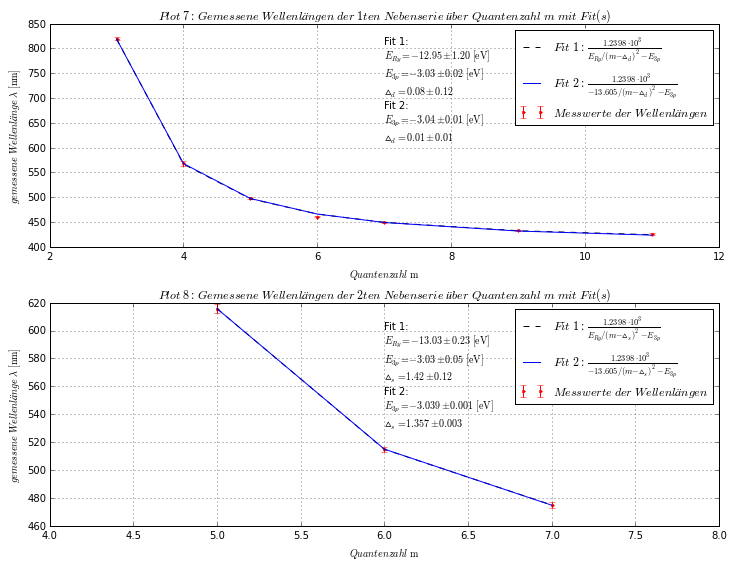

In [45]:
### data
# erste serie
m1 = np.array([3, 4, 5, 6, 7, 9, 11])
series1 = np.array([819.04, 568.38, 497.93, 460.36, 449.23, 433.05, 426.68])
series1_err = np.array([3, 5, 2, 1, 1, 1, 2])

#zweite serie
m2 = np.array([5, 6, 7])
series2 = np.array([615.73, 514.80, 474.89])
series2_err = np.array([3, 2, 2])

### fitting
def series_fit(m, Ery, E3p, delta_d):
    ## for series 2 delta_d is delta_s
    return 1.2398e3/(Ery/(m-delta_d)**2 - E3p)

# series1
popt_s1, pcov_s1 = curve_fit(series_fit, m1, series1, p0=[-13.605, -3.0255, 1])   
popt_s1_err = np.sqrt(np.diag(pcov_s1))
print('series1:\n',popt_s1, popt_s1_err)
par_str1 = r'$E_{Ry}=-12.95\pm1.20\ \mathrm{[eV]}$' + '\n' + r'$E_{3p}=-3.03\pm0.02\ \mathrm{[eV]}$' + '\n' + r'$\vartriangle_d=0.08\pm0.12$'

# series2
popt_s2, pcov_s2 = curve_fit(series_fit, m2, series2, p0=[-13.605, -3.0255, 1])   
popt_s2_err = np.sqrt(np.diag(pcov_s2))
print('series2:\n',popt_s2, popt_s2_err)
par_str2 = r'$E_{Ry}=-13.03\pm0.23\ \mathrm{[eV]}$' + '\n' + r'$E_{3p}=-3.03\pm0.05\ \mathrm{[eV]}$' + '\n' + r'$\vartriangle_s=1.42\pm0.12$'

### fitting with fixed E_Ry
def series_fit_fixed_Ery(m, E3p, delta_d):
    ## for series 2 delta_d is delta_s
    return 1.2398e3/((-13.605)/((m-delta_d)**2) - E3p)

# series1_fixed Ery
popt_s1_fixed, pcov_s1_fixed = curve_fit(series_fit_fixed_Ery, m1, series1, p0=[-3, 0.05])   
popt_s1_fixed_err = np.sqrt(np.diag(pcov_s1_fixed))
print('series1_fixed:\n',popt_s1_fixed, popt_s1_fixed_err)
par_str1_fixed = r'$E_{3p}=-3.04\pm0.01\ \mathrm{[eV]}$' + '\n' + r'$\vartriangle_d=0.01\pm0.01$'

# series2_fixed Ery
popt_s2_fixed, pcov_s2_fixed = curve_fit(series_fit_fixed_Ery, m2, series2, p0=[-3.0255, 1])   
popt_s2_fixed_err = np.sqrt(np.diag(pcov_s2_fixed))
print('series2_fixed:\n',popt_s2_fixed, popt_s2_fixed_err)
par_str2_fixed = r'$E_{3p}=-3.039\pm0.001\ \mathrm{[eV]}$' + '\n' + r'$\vartriangle_s=1.357\pm0.003$'

### plotting
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=.25)

# erste serie
params_plot7 = r'Fit 1:' + '\n' + par_str1 + '\n' + 'Fit 2:' + '\n' + par_str1_fixed
ax = fig.add_subplot(211)
ax.errorbar(m1, series1, yerr=series1_err, fmt='r.', label='$Messwerte\ der\ Wellenlängen$')
ax.plot(m1, series_fit(m1, *popt_s1), 'k--', label='$Fit\ 1:\ \\frac{1.2398\cdot10^3}{E_{Ry}/(m-\\vartriangle_d)^2-E_{3p}}$')
ax.plot(m1, series_fit_fixed_Ery(m1, *popt_s1_fixed), 'b-', 
        label='$Fit\ 2:\ \\frac{1.2398\cdot10^3}{-13.605/(m-\\vartriangle_d)^2-E_{3p}}$')
ax.set_xlim(2,12)
ax.text(7,610, params_plot7)
ax.set_title('$Plot\ 7:\ Gemessene\ Wellenlängen\ der\ 1ten\ Nebenserie\ über\ Quantenzahl\ m\ mit\ Fit(s)$')
ax.set_xlabel('$Quantenzahl\ \mathrm{m}$')
ax.set_ylabel('$gemessene\ Wellenlänge\ \lambda\ \mathrm{[nm]}$')
ax.grid()
ax.legend(fontsize=12)

# zweite serie
params_plot8 = r'Fit 1:' + '\n' + par_str2 + '\n' + 'Fit 2:' + '\n' + par_str2_fixed
ax = fig.add_subplot(212)
ax.errorbar(m2, series2, yerr=series2_err, fmt='r.', label='$Messwerte\ der\ Wellenlängen$')
ax.plot(m2, series_fit(m2, *popt_s2), 'k--', label='$Fit\ 1:\ \\frac{1.2398\cdot10^3}{E_{Ry}/(m-\\vartriangle_s)^2-E_{3p}}$')
ax.plot(m2, series_fit_fixed_Ery(m2, *popt_s2_fixed), 'b-', 
        label='$Fit\ 2:\ \\frac{1.2398\cdot10^3}{-13.605/(m-\\vartriangle_s)^2-E_{3p}}$')
ax.set_xlim(4,8)
ax.text(6, 530, params_plot8)
ax.set_title('$Plot\ 8:\ Gemessene\ Wellenlängen\ der\ 2ten\ Nebenserie\ über\ Quantenzahl\ m\ mit\ Fit(s)$')
ax.set_xlabel('$Quantenzahl\ \mathrm{m}$')
ax.set_ylabel('$gemessene\ Wellenlänge\ \lambda\ \mathrm{[nm]}$')
ax.grid()
ax.legend(fontsize=12)
#plt.savefig('.data/plot7_8.pdf', dpi = 200, format='pdf')